In [107]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def load_simulation_data(M, T, rho, simJob):
    return np.load("../results/argon-M-%d-T-%.2f-rho-%.2f-simjob-%d.npz" % (M,T,rho,simJob))

In [108]:
Ms = [6]
Ts = np.linspace(0.0, 4.0, 17)
rhos = np.concatenate((np.array([0.02, 0.05]), np.linspace(0.1, 2.0, 20)))
simJobs = np.arange(1,5)

In [109]:
cvs = np.zeros((len(Ts), len(rhos)))

for i in range(0, len(Ts)):
    for j in range(0, len(rhos)):
        data = load_simulation_data(6, Ts[i], rhos[j], 1)
        cvs[i,j] = data["cv"]


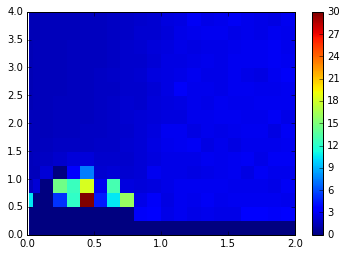

In [110]:
plt.pcolor(rhos, Ts, cvs)
plt.clim(0,30)
plt.colorbar()

In [111]:
rhos[13]

1.2

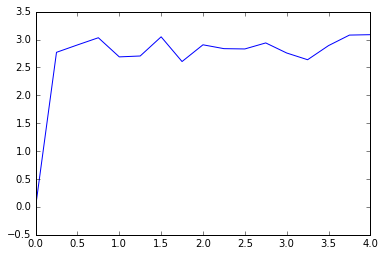

In [112]:
plt.plot(Ts, cvs[:,13])

0.3


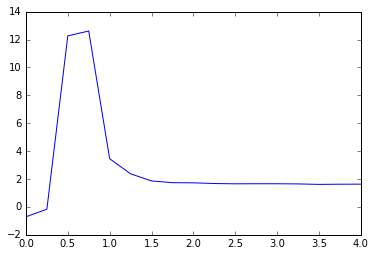

In [113]:
r = 4

print(rhos[r])
plt.plot(Ts, cvs[:,r])

0.3
0.5
12.2616831647


(0, 1.5)

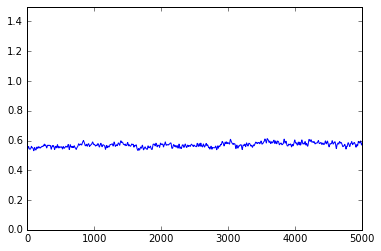

In [114]:
rhoI = r
TI = 2

print(rhos[rhoI])
print(Ts[TI])
print(cvs[TI, rhoI])

plt.plot(load_simulation_data(6, Ts[TI], rhos[rhoI], 1)["temperature"])
plt.ylim([0, 1.5])

In [115]:
linfits = np.zeros((len(Ts), len(rhos), 2))

for i in range(0, len(Ts)):
    for j in range(0, len(rhos)):
        data = load_simulation_data(6, Ts[i], rhos[j], 1)
        linfits[i,j,:] = np.polyfit(np.arange(0,5000) * data["h"], data["temperature"], 1)

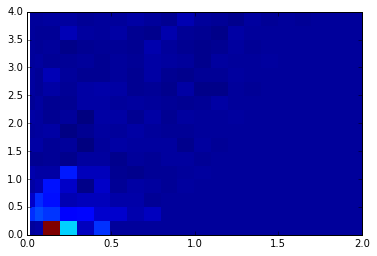

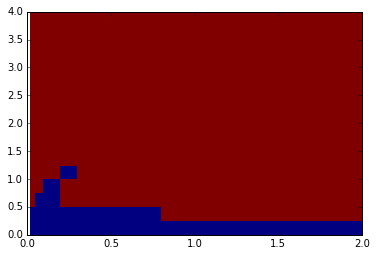

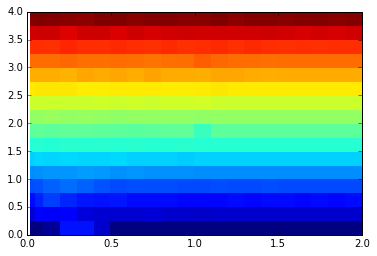

In [116]:
plt.pcolor(rhos, Ts,linfits[:,:,0])
plt.figure()
plt.pcolor(rhos, Ts,np.sign(cvs))
plt.figure()
plt.pcolor(rhos, Ts,linfits[:,:,1])

In [117]:
Ps = np.zeros((len(Ts), len(rhos)))

for i in range(0, len(Ts)):
    for j in range(0, len(rhos)):
        data = load_simulation_data(6, Ts[i], rhos[j], 1)
        Ps[i,j] = data["pressure"]

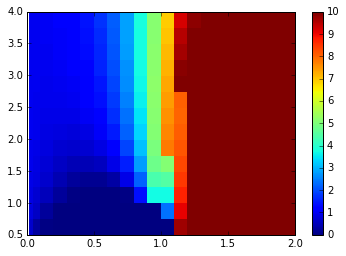

In [124]:
plt.pcolor(rhos, Ts[2:], Ps[2:])
plt.clim(0,10)
plt.colorbar()

4.4899961302210265
2.902593506863722


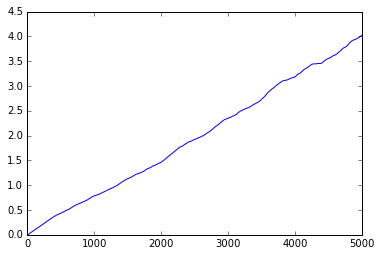

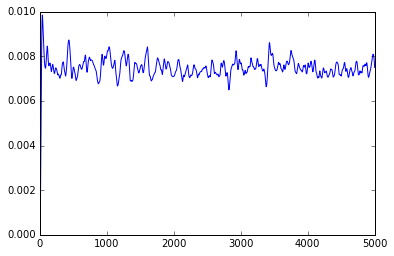

In [145]:
diffData1 = load_simulation_data(6, 0.5, 0.5, 1)
diffDist1 = diffData1["diffusion_distance"]
print(diffData1["cv"])
plt.plot(diffDist1)

diffData2 = load_simulation_data(6, 0.5, 1.2, 1)
diffDist2 = diffData2["diffusion_distance"]
print(diffData2["cv"])
plt.figure()
plt.plot(diffDist2)


In [146]:
Ds = np.zeros((len(Ts), len(rhos)))

for i in range(0, len(Ts)):
    for j in range(0, len(rhos)):
        data = load_simulation_data(6, Ts[i], rhos[j], 1)
        Ds[i,j] = np.polyfit(np.arange(0,2000) * data["h"], data["diffusion_distance"][3000:], 1)[1]

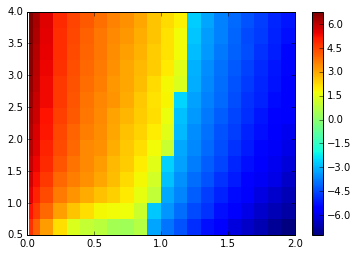

In [186]:
plt.pcolor(rhos, Ts[2:], np.log(Ds[2:,:]))
plt.colorbar()

0.7
0.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0


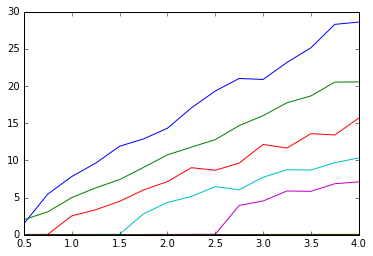

In [179]:
r = 8
for r in range(8,22):
    print(rhos[r])
    plt.plot(Ts[2:], Ds[2:,r])